In [113]:
import numpy as np
import matplotlib.pyplot as plt
import control

### Lambda-tuning of PI controller

The transfer function of the process:

$$ P(s)=\frac{k}{(1+T_1s)(1+T_2s)(1+T_3s)} $$

In [114]:
# parameters of the original PT3
k = 2
T1 = 1
T2 = 1
T3 = 1

# polynomials in the original PT3 process
numP = k/T1/T2/T3
p = np.poly1d([-1/T1, -1/T2, -1/T3], r=True)
denP = p.coeffs

P = control.tf(numP, denP)

In [115]:
# step response of the process
t = np.linspace(0,10,1000)
t, vt_P = control.step_response(P,t)

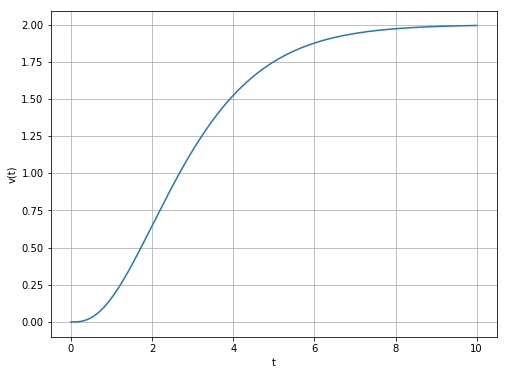

In [116]:
# plot the step response
plt.figure(figsize=(8,6))
plt.plot(t,vt_P), plt.grid(True), plt.xlabel('t'), plt.ylabel('v(t)');

Appriximating with FOPTD process:

$$ P(s) = \frac{k}{1+T_1 s}e^{-\tau s}$$

In [117]:
# approximating with FOPTD process
ix_1 = 250
ix_2 = 500
t1, t2 = t[ix_1], t[ix_2]
v1, v2 = vt_P[ix_1], vt_P[ix_2]
k = 2
# calc T1 and tau
T1 = (t2-t1)/np.log((k-v1)/(k-v2))
tau = T1*np.log((k-v1)/k) + t1
T1, tau

(1.696288463625719, 1.4672059927006864)

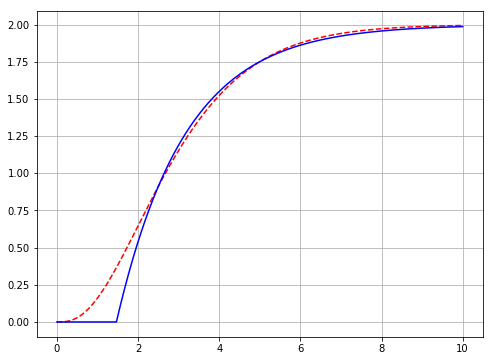

In [118]:
# compare the original and the approximated step responses
vt_approx = k*(1-np.exp(-(t-tau)/T1))*(t>tau)

plt.figure(figsize=(8,6))
plt.plot(t,vt_P,'r--'),
plt.plot(t,vt_approx,'b-'), plt.grid(True);

In [119]:
# the controller parameters from tuning table (PI case)
# [Kp = T1 / (k*lm), Ti = T1]
lm = 4
Kp = T1/(k*lm)
Ti = T1

The transfer function of the PI controller is:

$$ C(s) = Kp\left(1+\frac{1}{T_i s}\right) = \frac{K_p(1+T_i s)}{T_i s}$$

In [120]:
# define the controller
numC = [Kp*Ti, Kp]
denC = [Ti, 0]
C = control.tf(numC, denC)

In [121]:
# the open loop and closed loop transfer functions
G0 = control.series(C, P)
G = control.feedback(G0)

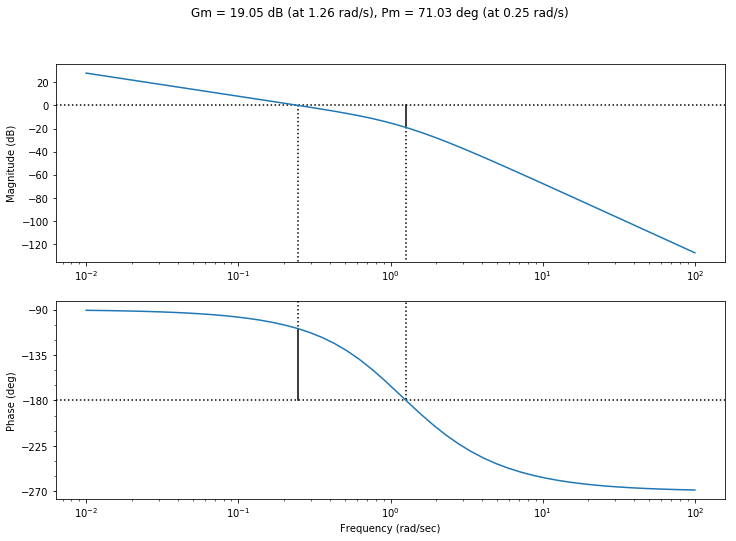

In [122]:
# Bode plot of the open loop with stability margins
plt.figure(figsize=(12,8))
omega = np.logspace(-4,3,1000)
Mag, Phase, freq = control.bode(G0, dB=True, margins=True)

In [123]:
# step response of the closed loop
t, vt_G = control.step_response(G)

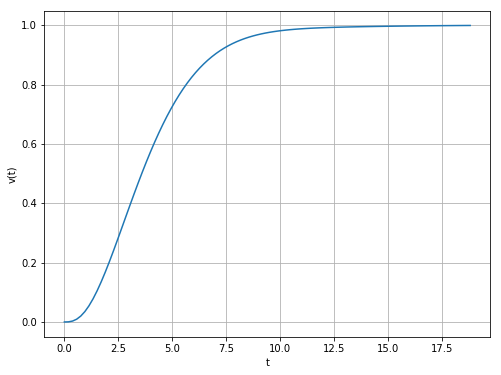

In [124]:
# plot the step response
plt.figure(figsize=(8,6))
plt.plot(t, vt_G), plt.grid(True), plt.xlabel('t'), plt.ylabel('v(t)');

In [125]:
control.step_info(G)

{'RiseTime': 5.455431644001697,
 'SettlingTime': 9.782153292692698,
 'SettlingMin': 0.8999454118021215,
 'SettlingMax': 0.9989001837305445,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9989001837305445,
 'PeakTime': 18.793021421923086,
 'SteadyStateValue': 0.9989001837305445}

In [126]:
#